**Synopsis:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("data_cardiovascular_risk.csv")
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
dataset.shape

(3390, 17)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Dataset Pre-Pruning or Dropping unwanted features

In [5]:
dataset.drop(['id','education','is_smoking'],axis=1,inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   cigsPerDay       3368 non-null   float64
 3   BPMeds           3346 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3352 non-null   float64
 8   sysBP            3390 non-null   float64
 9   diaBP            3390 non-null   float64
 10  BMI              3376 non-null   float64
 11  heartRate        3389 non-null   float64
 12  glucose          3086 non-null   float64
 13  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 370.9+ KB


# Handling a missing value

In [7]:
dataset.isnull().sum()*100/len(dataset)

age                0.000000
sex                0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [8]:
dataset.isnull().sum()

age                  0
sex                  0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
dataset.cigsPerDay.unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

In [10]:
dataset.BPMeds.unique()

array([ 0., nan,  1.])

In [11]:
dataset.totChol.unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

In [12]:
dataset.BMI.unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

In [13]:
dataset.heartRate.unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

In [14]:
dataset.glucose.unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

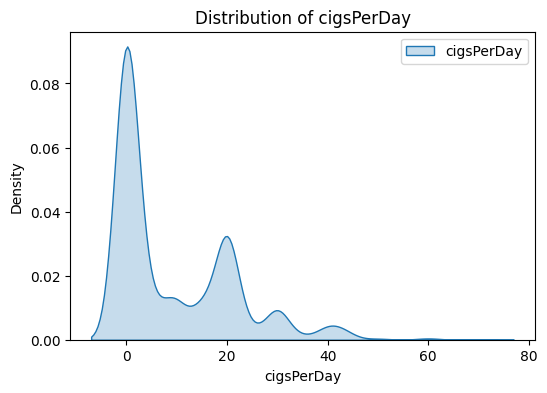

In [15]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of cigsPerDay')
sns.kdeplot(dataset['cigsPerDay'],shade = True, label='cigsPerDay')
plt.legend()

We can see the above digram the line repeated up and down,so better to take mode


In [16]:
dataset.cigsPerDay.fillna(dataset.cigsPerDay.mode()[0],inplace = True)

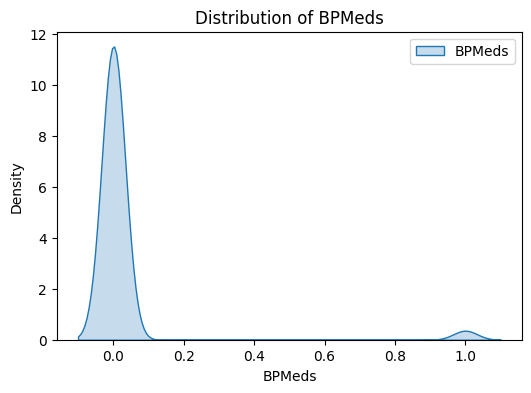

In [17]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of BPMeds')
sns.kdeplot(dataset['BPMeds'],shade = True, label='BPMeds')
plt.legend()

We can see the above digram the value of zero is and one is less so here our mean and mode can't work so that we take front  ffill() 

In [18]:
dataset.BPMeds.fillna(dataset.BPMeds.ffill(),inplace=True)

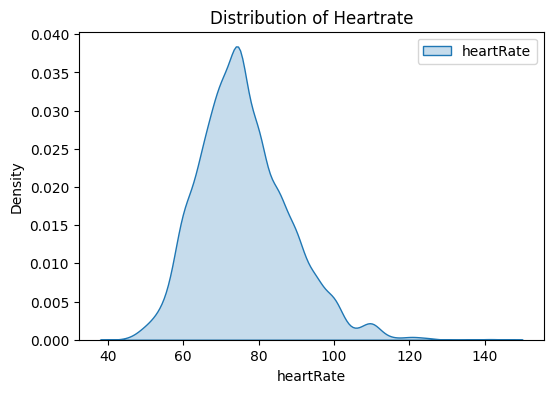

In [19]:
plt.figure(figsize=(6,4))
#plt.subplot()
plt.title('Distribution of Heartrate')
sns.kdeplot(dataset['heartRate'],shade=True,label='heartRate')
plt.legend()

In [20]:
dataset.heartRate.fillna(dataset.heartRate.median(),inplace = True)

It's look postive that's why i choosed median 

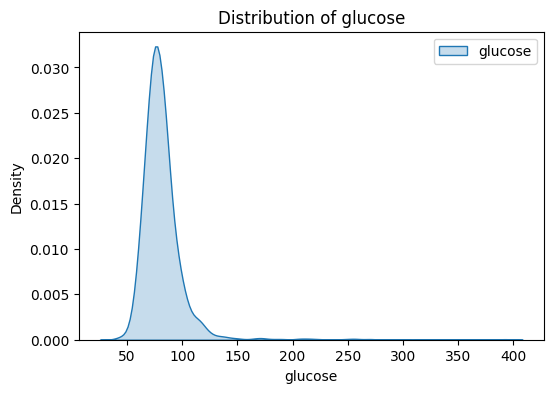

In [21]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of glucose')
sns.kdeplot(dataset['glucose'],shade = True, label='glucose')
plt.legend()

In [22]:
dataset.glucose.fillna(dataset.glucose.median(),inplace = True)

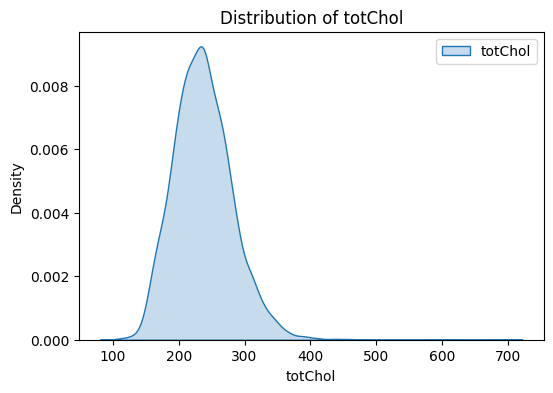

In [23]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of totChol')
sns.kdeplot(dataset['totChol'],shade = True, label='totChol')
plt.legend()

In [24]:
dataset.totChol.fillna(dataset.totChol.median(),inplace=True)

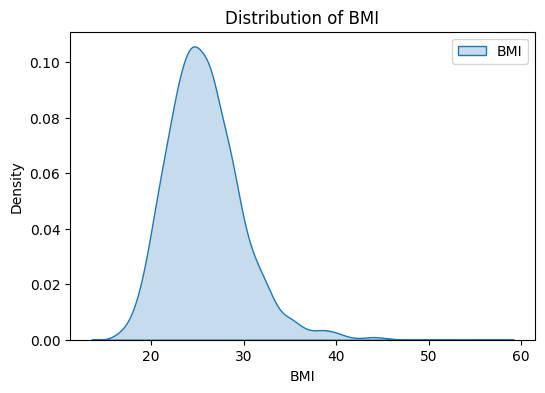

In [25]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of BMI')
sns.kdeplot(dataset['BMI'],shade = True, label='BMI')
plt.legend()

In [26]:
dataset.BMI.fillna(dataset.BMI.mean(),inplace = True)

It's in float value that's why I taken a mean inseated taking mode value

# Feature Engineering- One Hot Encoding

In [27]:
dataset = pd.get_dummies(dataset,columns=['sex'],drop_first=True)

In [28]:
dataset =dataset.rename(columns={'sex_M':'sex'})

# Descriptive Analysis

In [29]:
dataset.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.794964,75.976991,81.720059,0.150737,0.432743
std,8.592878,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.106939,11.970114,23.161265,0.357846,0.495529
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.400000,75.000000,78.000000,0.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000,1.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   cigsPerDay       3390 non-null   float64
 2   BPMeds           3390 non-null   float64
 3   prevalentStroke  3390 non-null   int64  
 4   prevalentHyp     3390 non-null   int64  
 5   diabetes         3390 non-null   int64  
 6   totChol          3390 non-null   float64
 7   sysBP            3390 non-null   float64
 8   diaBP            3390 non-null   float64
 9   BMI              3390 non-null   float64
 10  heartRate        3390 non-null   float64
 11  glucose          3390 non-null   float64
 12  TenYearCHD       3390 non-null   int64  
 13  sex              3390 non-null   uint8  
dtypes: float64(8), int64(5), uint8(1)
memory usage: 347.7 KB


# Outlier Treament

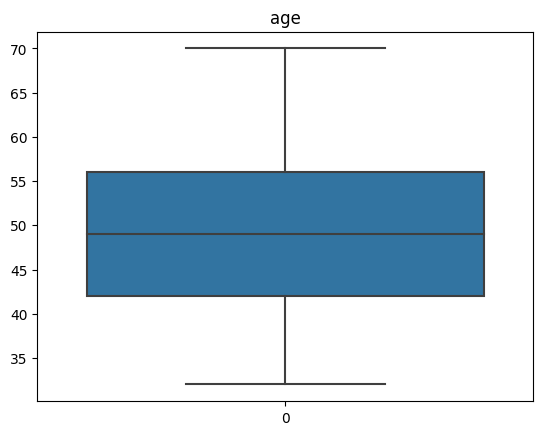

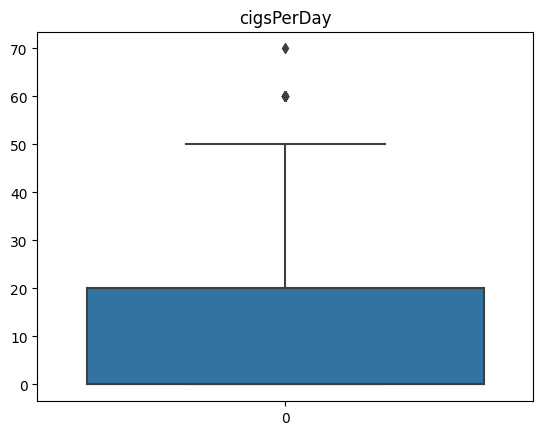

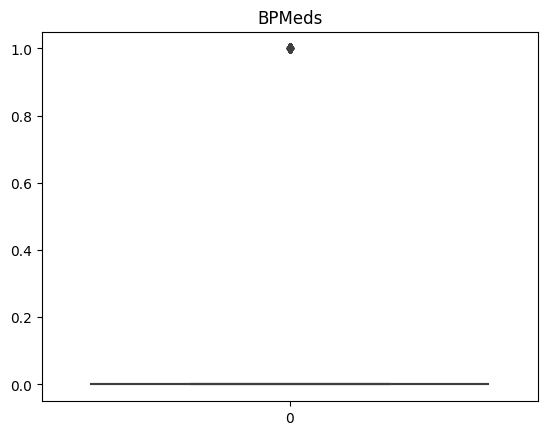

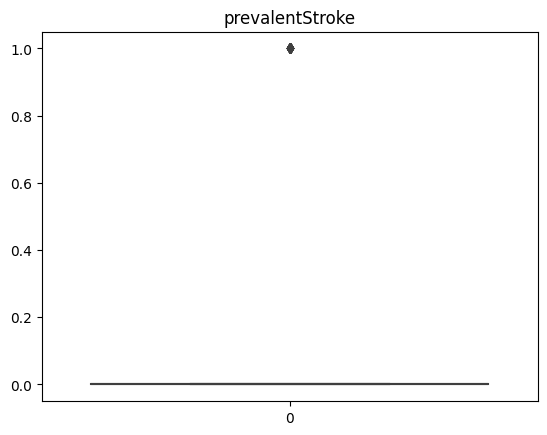

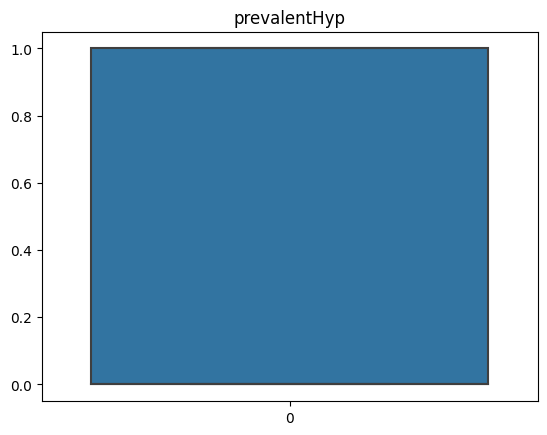

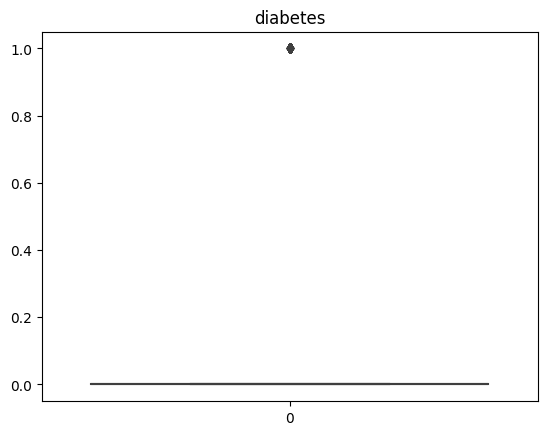

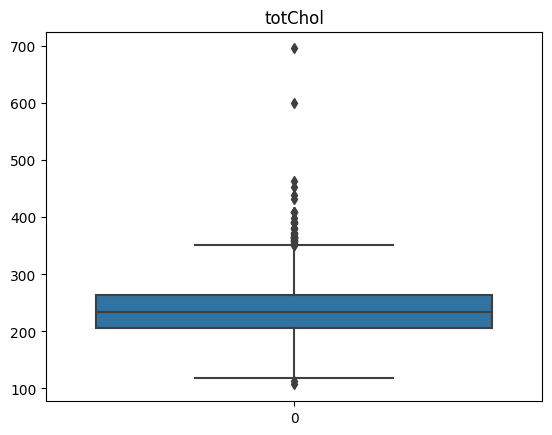

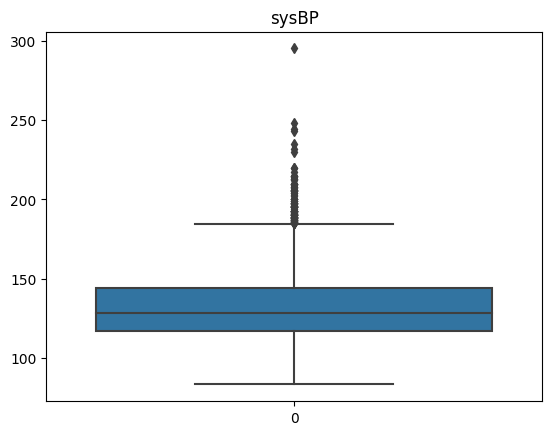

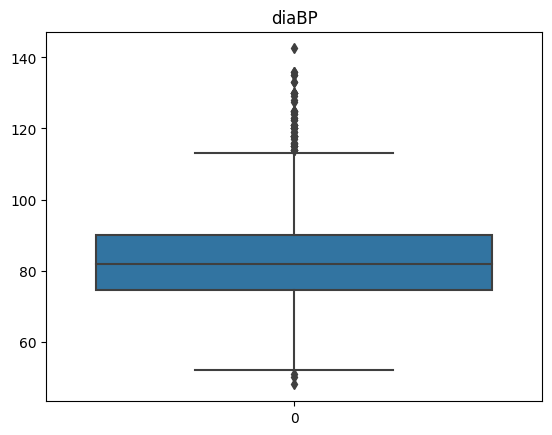

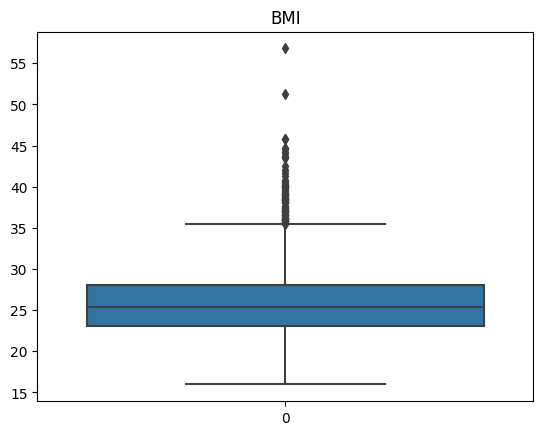

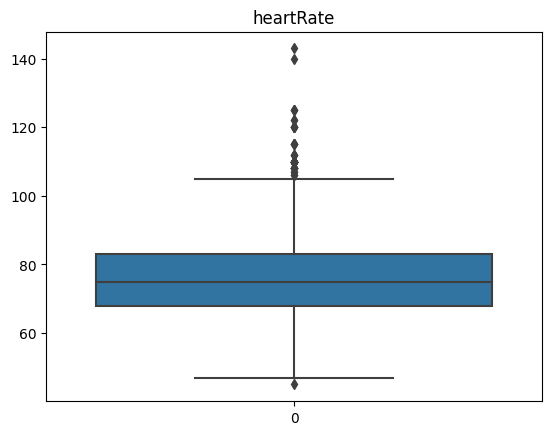

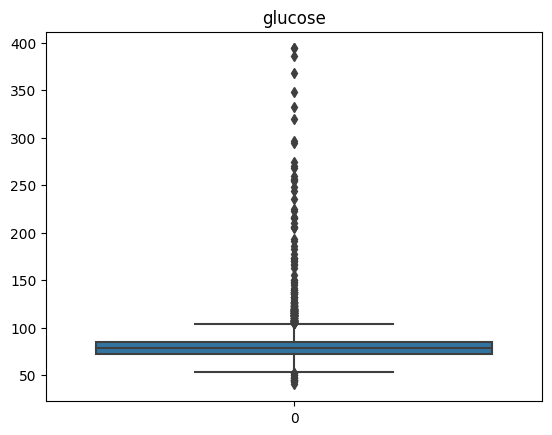

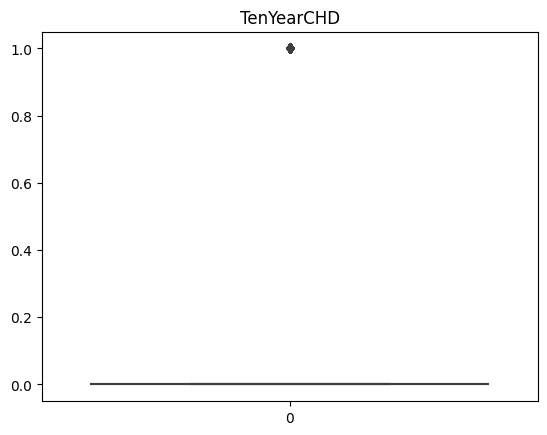

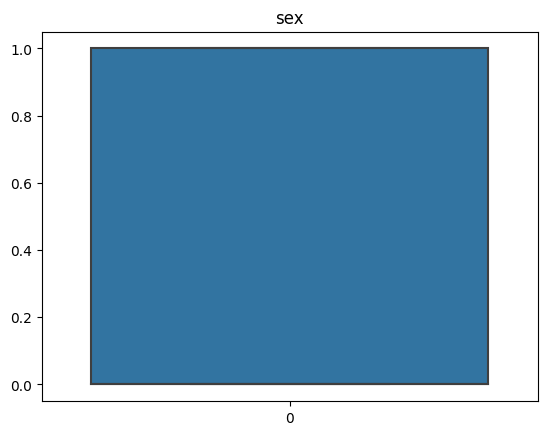

In [31]:
for i in dataset:
    sns.boxplot(dataset[i])
    plt.title(i)
    plt.show()


In [32]:
dataset.cigsPerDay = np.where(dataset.cigsPerDay>50, 50,dataset.cigsPerDay)
dataset.totChol = np.where(dataset.totChol>450, 450,dataset.totChol)
dataset.BMI = np.where(dataset.BMI>50, 50,dataset.BMI)
dataset.sysBP = np.where(dataset.sysBP>250, 250,dataset.sysBP)

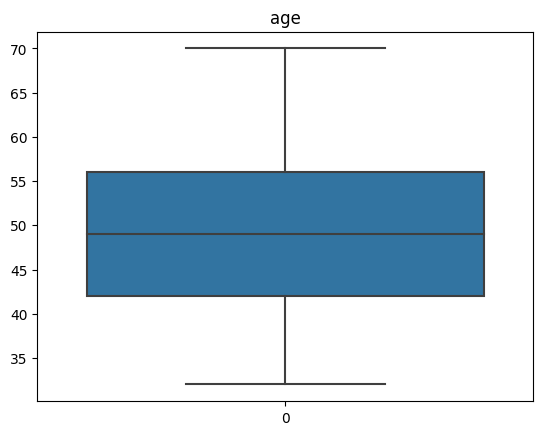

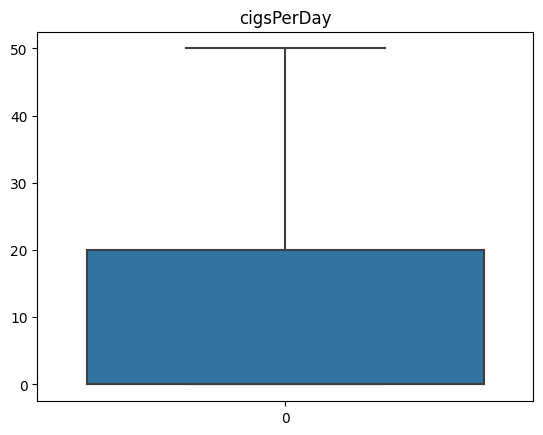

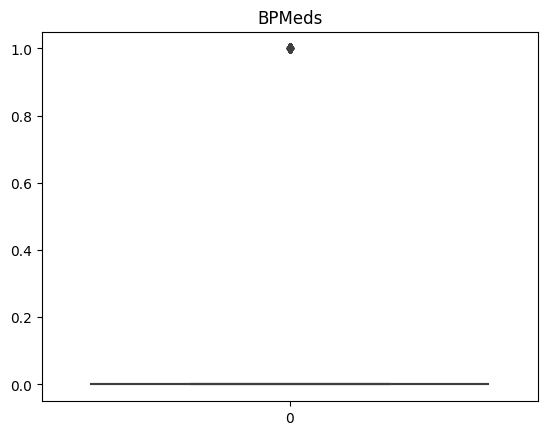

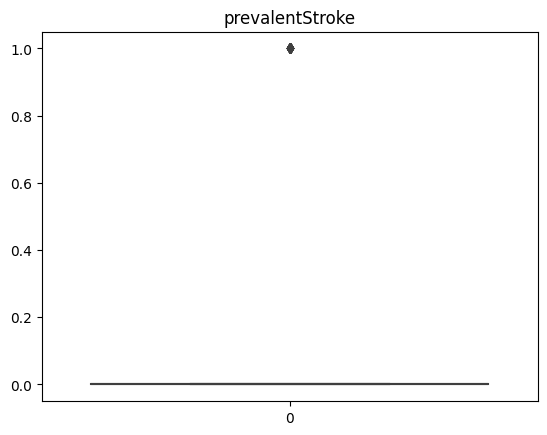

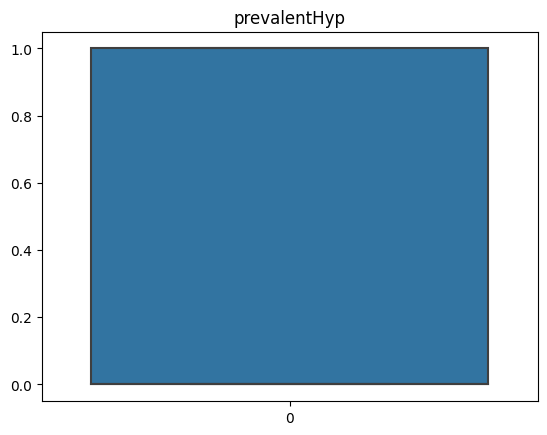

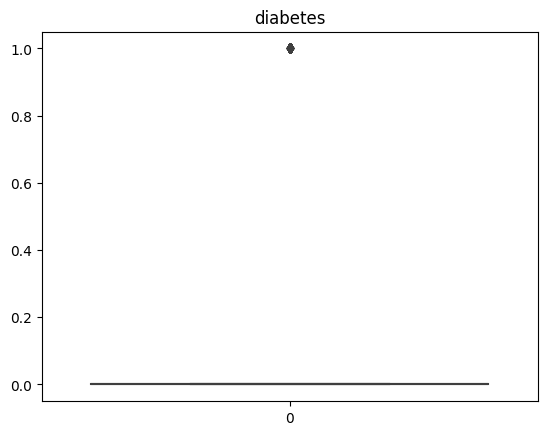

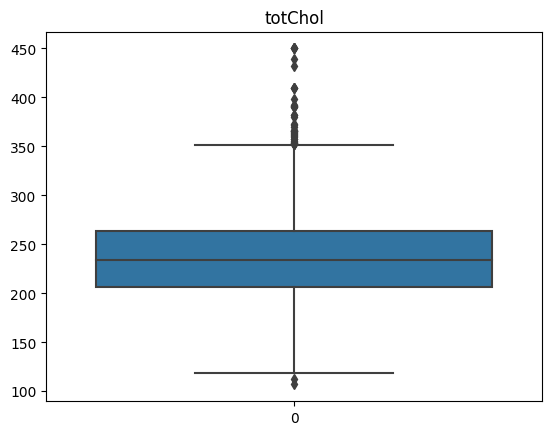

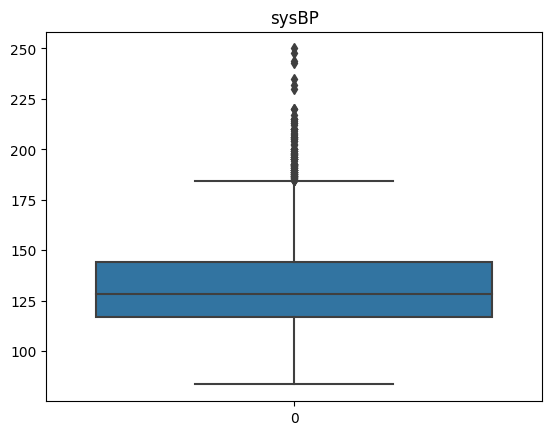

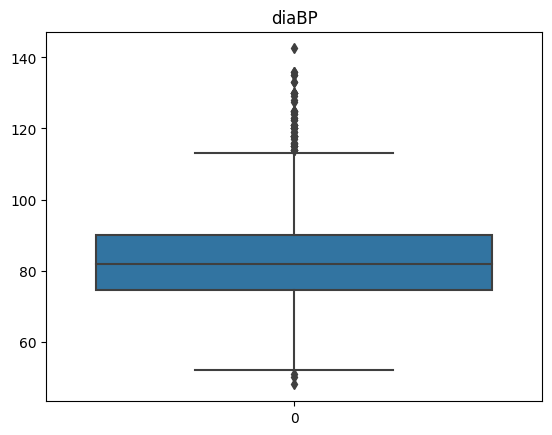

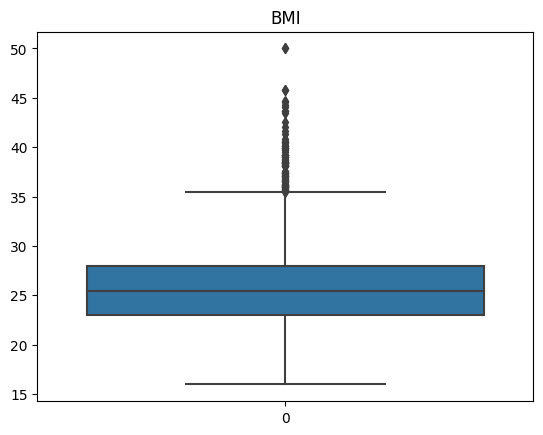

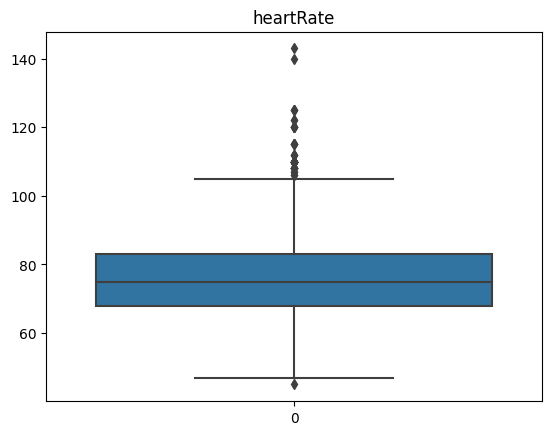

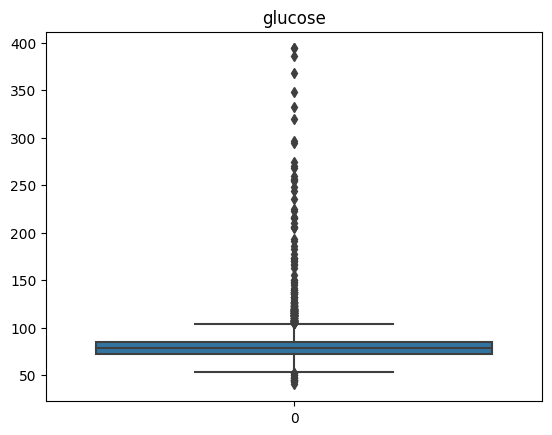

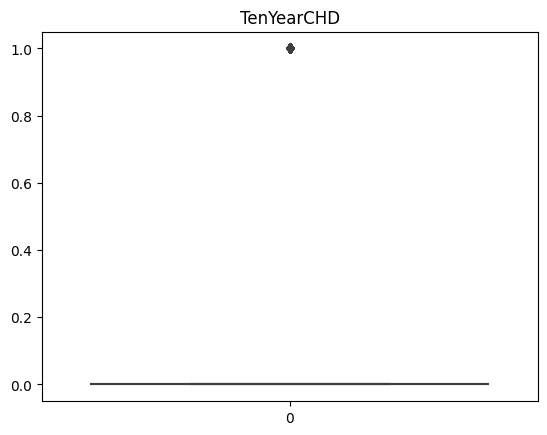

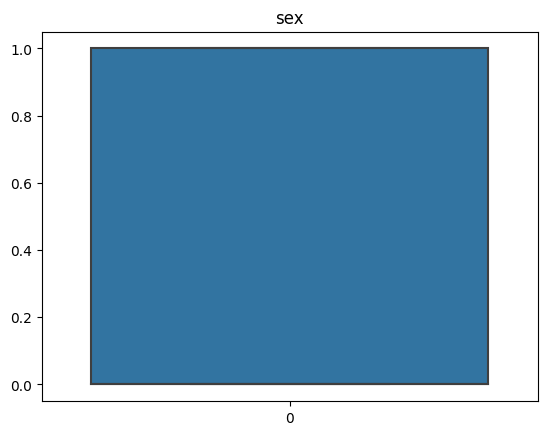

In [33]:
for i in dataset:
    sns.boxplot(dataset[i])
    plt.title(i)
    plt.show()


# Imbalance Data Treatment

In [34]:
dataset.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [35]:
import imblearn

In [36]:
dataset.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex'],
      dtype='object')

In [37]:
x = dataset[['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'sex']]

In [38]:
x.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [39]:
y = dataset['TenYearCHD']

In [40]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [41]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [42]:
print(y_over.value_counts())
print(x_over.shape, y_over.shape)
print(x.shape, y.shape)

1    2879
0    2879
Name: TenYearCHD, dtype: int64
(5758, 13) (5758,)
(3390, 13) (3390,)


In [43]:
y_over.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [44]:
x_over.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [45]:
df1 = pd.concat([x_over,y_over],axis=1)

In [46]:
df1.tail()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex,TenYearCHD
5753,47,18.0,0.0,0,1,0,439.0,145.0,74.0,22.42,100.0,90.0,1,1
5754,47,30.0,0.0,0,0,0,143.0,114.0,79.0,26.59,69.0,72.0,1,1
5755,52,15.0,0.0,0,0,0,225.0,131.0,74.0,24.54,65.0,77.0,1,1
5756,54,0.0,0.0,0,1,0,180.0,147.5,100.0,25.11,70.0,70.0,1,1
5757,41,43.0,0.0,0,0,0,249.0,125.0,87.0,27.13,75.0,81.0,1,1


In [47]:
df1.shape

(5758, 14)

# Independent Variable Correlation check - Heatmap

<Axes: >

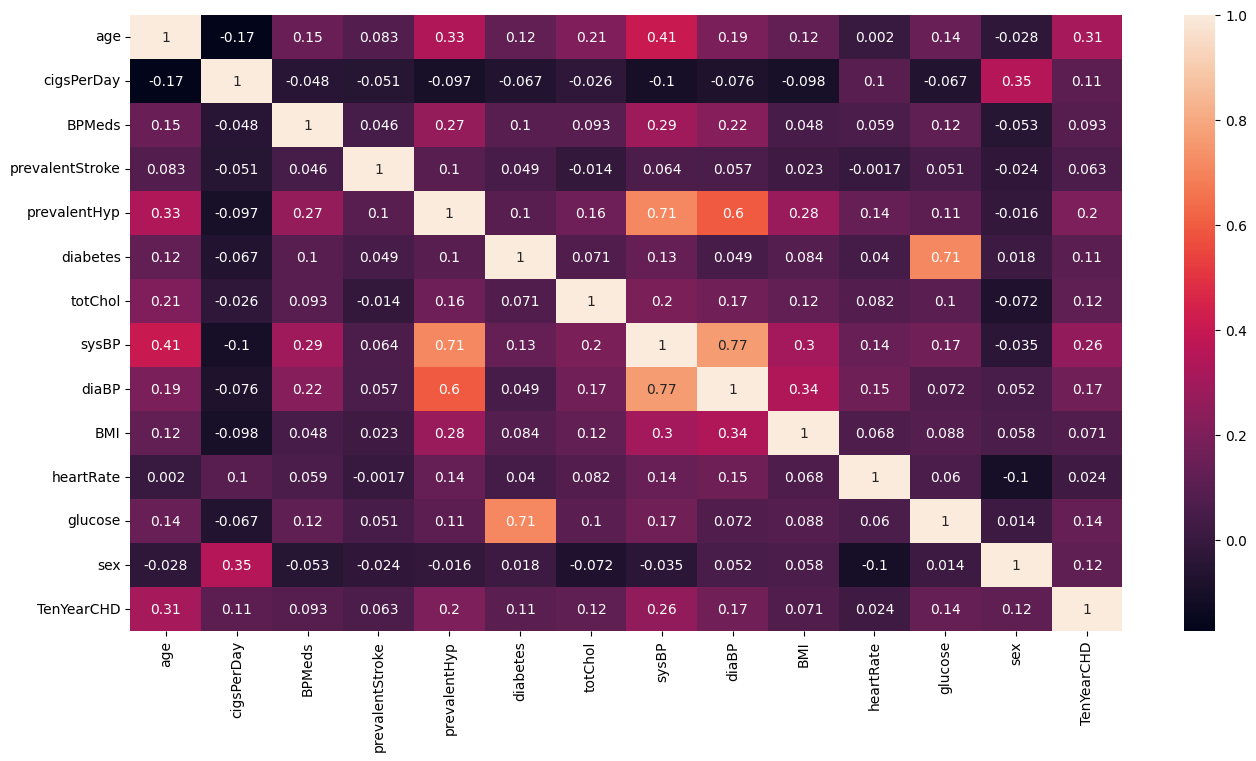

In [48]:
plt.figure(figsize=(16,8))

sns.heatmap(df1.corr(),annot = True)

# Exploratory Data Analysis

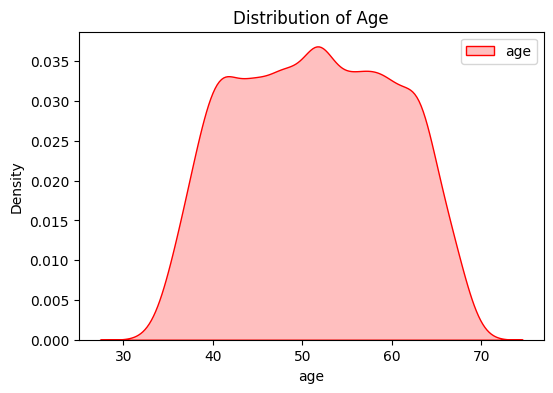

In [49]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of Age')
sns.kdeplot(df1['age'],shade = True, label='age',palette = 'red',color = 'red')
plt.legend()

<Axes: xlabel='sex', ylabel='TenYearCHD'>

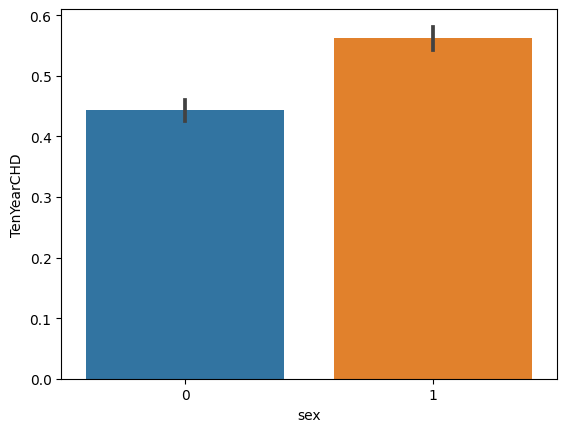

In [50]:
sns.barplot(data = df1,x='sex', y="TenYearCHD")

In [51]:
df1.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'sex', 'TenYearCHD'],
      dtype='object')

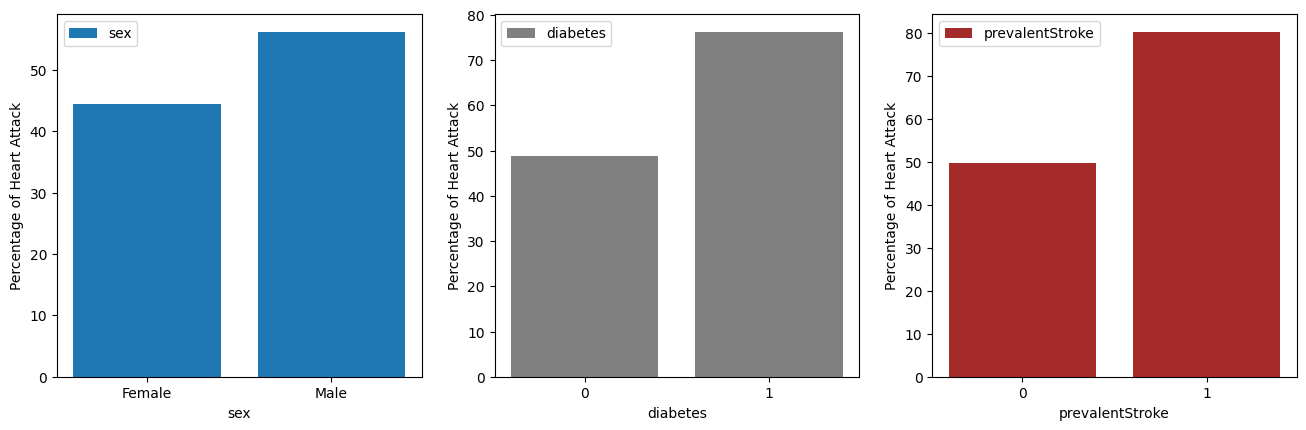

In [52]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=df1
name='sex'
l = [(100)*df[df[name]==0]['TenYearCHD'].sum()/len(df[df[name]==0]['TenYearCHD']),
     (100)*df[df[name]==1]['TenYearCHD'].sum()/len(df[df[name]==1]['TenYearCHD'])]
x=["Female","Male"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(332)
name='diabetes'
l = [(100)*df[df[name]==0]['TenYearCHD'].sum()/len(df[df[name]==0]['TenYearCHD']),
     (100)*df[df[name]==1]['TenYearCHD'].sum()/len(df[df[name]==1]['TenYearCHD'])]
x=["0","1"]
plt.bar(x,l,label='diabetes', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(333)
name='prevalentStroke'
l = [(100)*df[df[name]==0]['TenYearCHD'].sum()/len(df[df[name]==0]['TenYearCHD']),
     (100)*df[df[name]==1]['TenYearCHD'].sum()/len(df[df[name]==1]['TenYearCHD'])]
x=["0","1"]
plt.bar(x,l,label='prevalentStroke', color="brown" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

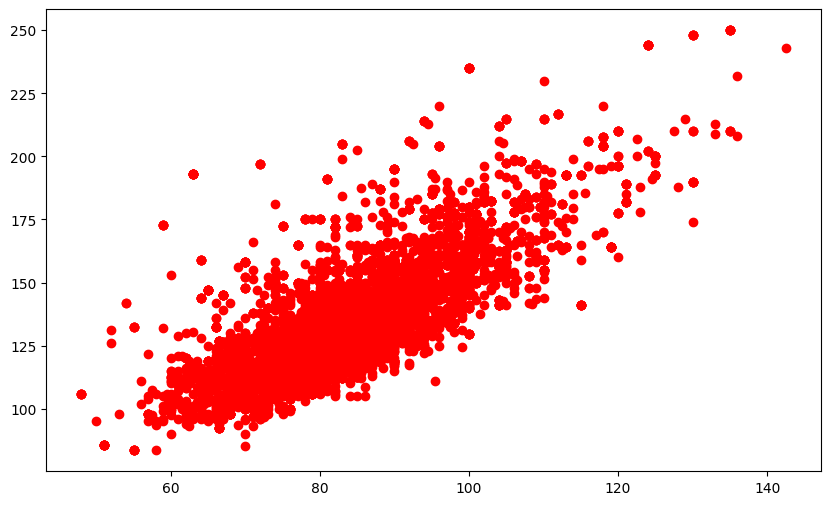

In [53]:
plt.figure(figsize= (10,6))
plt.scatter(x = df1['diaBP'],y = df1['sysBP'],c= 'red')
plt.show()

**Model Building**

In [54]:
from pycaret.classification import *

In [55]:
exp_clf = setup(data=df1, target='TenYearCHD',fold_shuffle = True,session_id = 1,preprocess = False)

,Description,Value
0,Session id,1
1,Target,TenYearCHD
2,Target type,Binary
3,Original data shape,"(5758, 14)"
4,Transformed data shape,"(5758, 14)"
5,Transformed train set shape,"(4030, 14)"
6,Transformed test set shape,"(1728, 14)"
7,Numeric features,13


In [56]:
# In classification whatever models have it will run on it, by automatically.And it automatically highlight all the accuracy and 
#with conclusion whatever tunning it done by itself
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9712,0.9895,0.9742,0.9685,0.9713,0.9424,0.9425,0.2300
rf,Random Forest Classifier,0.9536,0.9900,0.9801,0.9308,0.9548,0.9072,0.9086,0.3160
xgboost,Extreme Gradient Boosting,0.9203,0.9751,0.9782,0.8771,0.9248,0.8407,0.8466,0.3030
lightgbm,Light Gradient Boosting Machine,0.8901,0.9547,0.9414,0.8541,0.8955,0.7801,0.7846,0.3920
dt,Decision Tree Classifier,0.8859,0.8859,0.9782,0.8259,0.8955,0.7717,0.7854,0.0250
catboost,CatBoost Classifier,0.8685,0.9379,0.9107,0.8404,0.8738,0.7370,0.7403,3.2400
knn,K Neighbors Classifier,0.7653,0.8477,0.8690,0.7201,0.7873,0.5305,0.5427,0.0420
gbc,Gradient Boosting Classifier,0.7288,0.8143,0.7454,0.7221,0.7332,0.4576,0.4583,0.3370
ada,Ada Boost Classifier,0.6809,0.7507,0.6764,0.6826,0.6791,0.3618,0.3622,0.1350
ridge,Ridge Classifier,0.6702,0.0000,0.6725,0.6695,0.6706,0.3404,0.3408,0.0160


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1, verbose=0, warm_start=False)

In [57]:
# Creating a model of ExtraTreesClassifier because i confirmed my model is et,I used for creat_model
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9677,0.9964,0.9851,0.9519,0.9682,0.9355,0.9361
1,0.9677,0.9909,0.9701,0.9653,0.9677,0.9355,0.9355
2,0.9578,0.9841,0.9502,0.9646,0.9574,0.9156,0.9157
3,0.9603,0.9834,0.9602,0.9602,0.9602,0.9206,0.9206
4,0.9653,0.9928,0.9751,0.9561,0.9655,0.9305,0.9307
5,0.9826,0.9856,0.9802,0.9851,0.9826,0.9653,0.9653
6,0.9727,0.9938,0.9802,0.9659,0.9730,0.9454,0.9455
7,0.9777,0.9924,0.9851,0.9707,0.9779,0.9553,0.9554
8,0.9801,0.9844,0.9752,0.9850,0.9801,0.9603,0.9603


**Hypertune Model**

In [58]:
# If give Hypertune Model it will own self jumpple and shuffle and give the results,give the accuracy.
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6799,0.7426,0.6965,0.6731,0.6846,0.3599,0.3601
1,0.7097,0.7911,0.7264,0.7019,0.7139,0.4194,0.4197
2,0.6625,0.7294,0.6617,0.6617,0.6617,0.3251,0.3251
3,0.6352,0.6979,0.5622,0.6570,0.6059,0.2702,0.2731
4,0.6675,0.7318,0.6667,0.6667,0.6667,0.3350,0.3350
5,0.6799,0.7380,0.6188,0.7062,0.6596,0.3600,0.3628
6,0.6650,0.7243,0.6931,0.6573,0.6747,0.3299,0.3304
7,0.6600,0.7226,0.6436,0.6667,0.6549,0.3202,0.3203
8,0.6873,0.7498,0.6980,0.6845,0.6912,0.3747,0.3747


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


It self it saying us the orginal model is best don't go with hyper tune model.

In [59]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Validate Model**

In [60]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9711,0.9857,0.9688,0.9733,0.9710,0.9421,0.9421


,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex,TenYearCHD,prediction_label,prediction_score
2140,56,17.0,0.0,0,0,0,177.0,127.0,79.0,20.120001,70.0,88.0,1,0,0,0.76
992,54,0.0,0.0,0,1,0,227.0,168.0,94.0,22.700001,75.0,70.0,0,0,0,0.72
2528,51,30.0,0.0,0,0,0,272.0,133.0,91.0,28.500000,72.0,78.0,0,0,0,0.81
3714,59,0.0,1.0,0,1,0,264.0,244.0,124.0,19.610001,76.0,120.0,0,1,1,1.00
844,46,20.0,0.0,0,1,0,197.0,144.0,78.0,22.510000,72.0,60.0,0,0,0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,58,0.0,0.0,0,1,0,279.0,181.0,74.0,22.490000,66.0,65.0,1,0,0,0.71
2655,39,0.0,0.0,0,0,0,164.0,112.0,63.0,22.010000,60.0,85.0,0,0,0,0.98
4212,38,0.0,0.0,0,0,0,244.0,118.5,88.0,28.680000,77.0,65.0,1,1,1,1.00
1495,55,20.0,0.0,0,0,0,280.0,134.0,85.5,29.860001,80.0,75.0,1,0,0,0.60


**Conclusion Using Pycaret Model**

**Extra Trees Model using Pycaret Method gives best result. As this is Medical dataset with Cardio Vascular Risk Prediction,
We go for High Recall and High F1 score. Since Extra trees gives the best, I am concluding ET as final model.**

**Accuracy is 97.22%**

**Precision is 96.68%**

**Recall is 97.82%**

**F1_score is 97.24%**

**Model Building Using Normal Method**

In [61]:
df1.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex,TenYearCHD
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0


**Splitting of Independent and Dependent Variables**

In [62]:
# Two method to split the target data
#x = df1.iloc[:,:-1] 
x = df1.drop(['TenYearCHD'],axis=1)

In [63]:
x.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [64]:
#y = df1.iloc[:,-1]
y = df1['TenYearCHD']

In [65]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

**Splitting Data into Train and Test**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [68]:
x_train.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex
1346,45,0.0,0.0,0,0,0,297.0,134.0,93.0,28.81,92.0,74.0,0
3609,48,20.0,0.0,0,1,0,230.0,140.5,89.0,23.34,66.0,80.0,1
1269,49,0.0,0.0,0,0,0,257.0,115.0,75.0,25.61,72.0,74.0,0
4691,59,43.0,0.0,0,0,0,207.0,132.5,66.0,26.84,65.0,76.0,1
2093,66,0.0,0.0,0,0,0,305.0,138.0,86.0,20.74,75.0,62.0,0


In [69]:
y_train.head()

1346    0
3609    1
1269    0
4691    1
2093    1
Name: TenYearCHD, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Building

In [71]:
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [72]:
def evaluate_model(true, predicted):
    class_report = classification_report(true, predicted)
    accu_score = accuracy_score(true, predicted)
    pre_score = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return class_report, accu_score, pre_score, recall, f1

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Light Gradient Boost": LGBMClassifier(),
    "Gaussian naive": GaussianNB(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False)
}
model_list = []
f1 =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    class_report_train, accu_score_train, pre_score_train, recall_train, f1_train = evaluate_model(y_train, y_train_pred)

    class_report_test, accu_score_test, pre_score_test, recall_test, f1_test = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Classification Report: ", '\n',(class_report_train))
    print("- Accuracy Score:", (accu_score_train))
    print("- Precision Score:", (pre_score_train))
    print("- Recall Score:", (recall_train))
    print("- F1 Score:", (f1_train))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Classification Report: ", '\n',(class_report_test))
    print("- Accuracy Score:", (accu_score_test))
    print("- Precision Score:", (pre_score_test))
    print("- Recall Score:", (recall_test))
    print("- F1 Score:", (f1_test))
    
    f1.append(f1_test)
    
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Classification Report:  
               precision    recall  f1-score   support

           0       0.68      0.67      0.67      2158
           1       0.67      0.69      0.68      2160

    accuracy                           0.68      4318
   macro avg       0.68      0.68      0.68      4318
weighted avg       0.68      0.68      0.68      4318

- Accuracy Score: 0.6773969430291802
- Precision Score: 0.6747152619589977
- Recall Score: 0.6856481481481481
- F1 Score: 0.680137772675086
----------------------------------
Model performance for Test set
- Classification Report:  
               precision    recall  f1-score   support

           0       0.67      0.66      0.67       721
           1       0.67      0.67      0.67       719

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440

- Accuracy Score: 0.667361111

# Results

In [ ]:
pd.DataFrame(list(zip(model_list, f1)), columns=['Model Name', 'F1 Score']).sort_values(by=["F1 Score"],ascending=False)

# Conclusion Using Normal Method

In [ ]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');